# About the Dataset: A-Z Handwritten Alphabets

This dataset provides handwritten representations of English alphabets (A-Z), captured in grayscale images stored in a structured `.csv` format. It is designed to support machine learning projects, particularly in training models for handwritten character recognition. The dataset includes over **370,000 samples** of alphabets.

---

## Key Information

### Dataset Overview:
- **Size**: 370,000+ images of handwritten English alphabets.
- **Format**: Each image is represented as a row in a `.csv` file, with pixel values and corresponding labels.
- **Pixel Data**: Grayscale intensity values ranging from 0 (black) to 255 (white).
- **Labels**: Indicate the corresponding alphabet (A-Z).

### Image Details:
- **Resolution**: Each image is resized to `28x28` pixels.
- **Center-Fitting**: Alphabets are centered in a `20x20` pixel bounding box.
- **Noisy Samples**: Some noisy images may be present in the dataset.

---

## Column Descriptions

1. **Pixel Values**: 784 columns (28x28 pixels) representing the grayscale intensity of each pixel.
2. **Label**: Indicates the alphabet associated with the image, represented numerically (e.g., 0 = A, 1 = B, ..., 25 = Z).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
plt.rcParams["figure.figsize"] = (10, 6)  
import warnings
warnings.filterwarnings('ignore') 

## Preprocessing

In [2]:
df = pd.read_csv('A_Z Handwritten Data.csv')
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print("Dataset Information: \n")
df.info()

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [4]:
print("Dataset Shape: \n")
df.shape

Dataset Shape: 



(372450, 785)

In [5]:
# Rename columns (first column is the label, the rest are features)
df.rename(columns={'0':'label'}, inplace=True)
print(df.columns)

Index(['label', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9',
       ...
       '0.639', '0.640', '0.641', '0.642', '0.643', '0.644', '0.645', '0.646',
       '0.647', '0.648'],
      dtype='object', length=785)


In [6]:
df.head()

,label,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Identify the number of unique classes

In [7]:
# the first column contains the labels, let's check for unique values
unique_classes = df['label'].nunique()

print(f"Number of unique classes: {unique_classes}")

Number of unique classes: 26


### show their distribution.

In [8]:
# Show the distribution of labels (count of each class)
class_counts = df['label'].value_counts().sort_index()

# Print the sorted distribution
print("\nClass distribution (sorted):")
print(class_counts)


Class distribution (sorted):
0     13869
1      8668
2     23409
3     10134
4     11440
5      1163
6      5762
7      7218
8      1120
9      8493
10     5603
11    11586
12    12336
13    19010
14    57825
15    19341
16     5812
17    11566
18    48419
19    22495
20    29008
21     4182
22    10784
23     6272
24    10859
25     6076
Name: label, dtype: int64


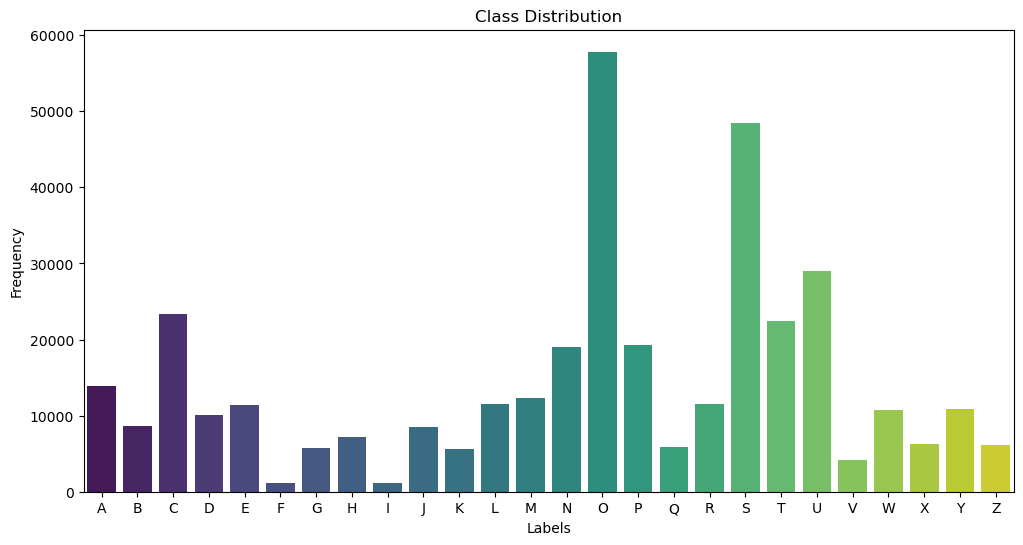

In [9]:
# Plot class distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Class Distribution")
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.xticks(range(26), [chr(i + 65) for i in range(26)])  # Convert numeric labels to alphabets
plt.show()

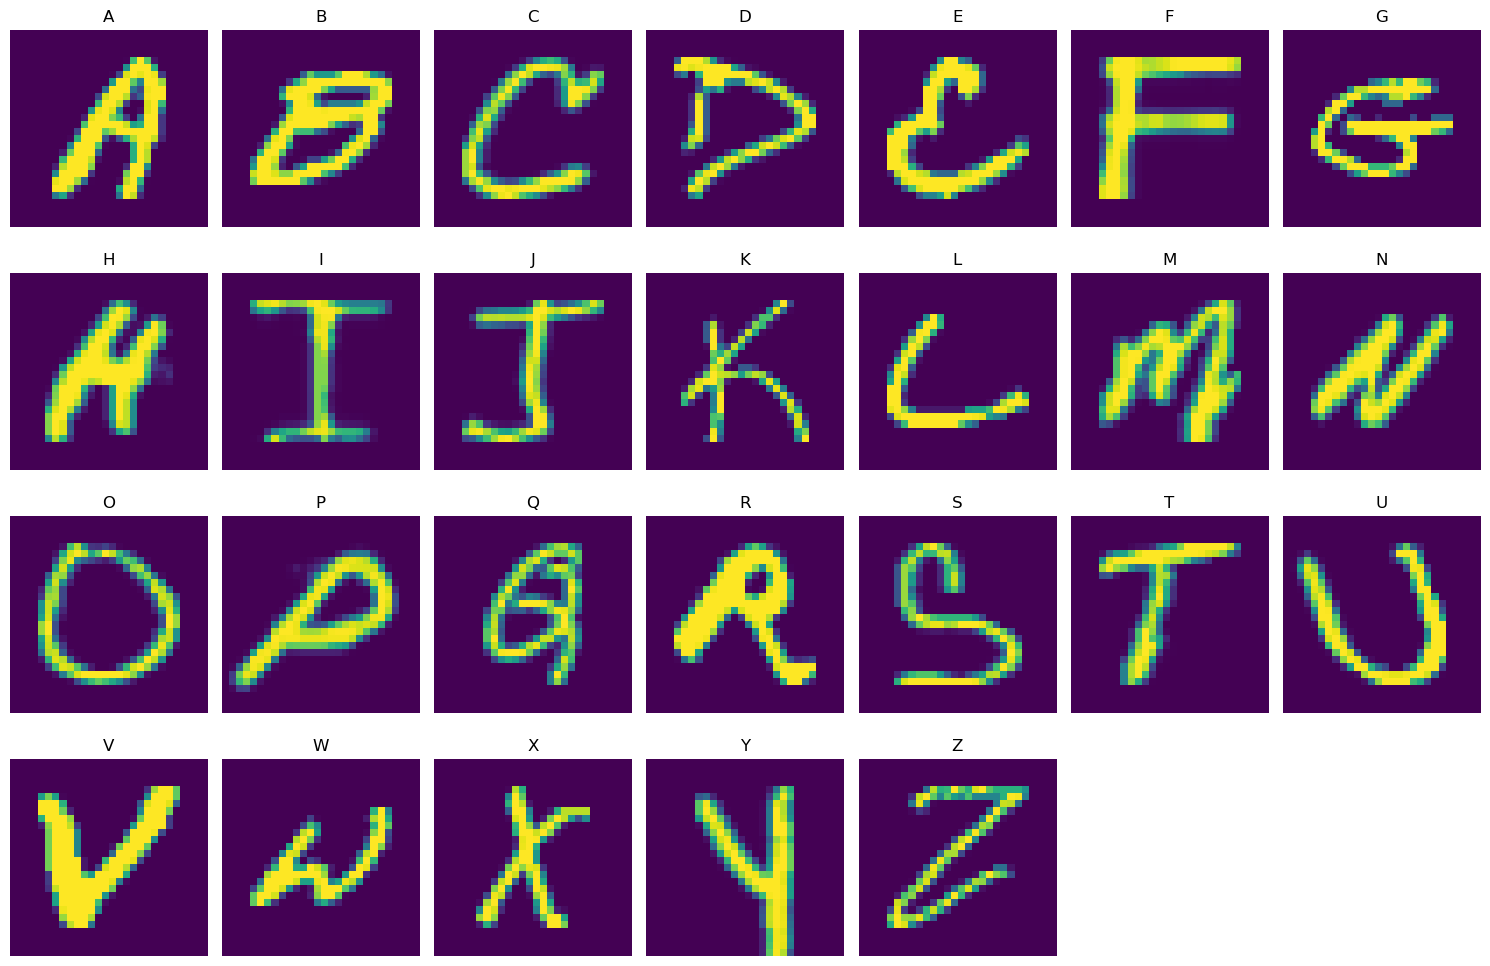

In [10]:
# Visualize samples for each class
plt.figure(figsize=(15, 10))
for label in range(26):
    sample = df[df['label'] == label].iloc[0, 1:].values.reshape(28, 28)
    plt.subplot(4, 7, label + 1)
    plt.imshow(sample, cmap='viridis')
    plt.axis('off')
    plt.title(chr(label + 65))
plt.tight_layout()
plt.show()

### Spliting Data Into Train and Test

In [11]:
# Split features and labels
X = df.iloc[:, 1:]
y = df['label']

In [12]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (297960, 784), (297960,)
Test set shape: (74490, 784), (74490,)


In [13]:
df.describe()

,label,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [14]:
# Map labels to alphabets
y_mapped = y.map(lambda x: chr(x + 65))

In [15]:
# Show the distribution of labels (count of each class)
class_counts = df['label'].value_counts().sort_index()

# Print the sorted distribution with corresponding characters
print("\nClass distribution (sorted with corresponding characters):")
for label, count in class_counts.items():
    print(f"{chr(label + 65)}: {count}")


Class distribution (sorted with corresponding characters):
A: 13869
B: 8668
C: 23409
D: 10134
E: 11440
F: 1163
G: 5762
H: 7218
I: 1120
J: 8493
K: 5603
L: 11586
M: 12336
N: 19010
O: 57825
P: 19341
Q: 5812
R: 11566
S: 48419
T: 22495
U: 29008
V: 4182
W: 10784
X: 6272
Y: 10859
Z: 6076


### Label Encoding

### Normalize each image

In [16]:
X_train = X_train.astype('float32') / 255.0  # Normalize to 0-1 range
X_test = X_test.astype('float32') / 255.0

In [17]:
# 8. Normalization Validation: Verify that the images are properly normalized
print(f"Minimum value in normalized train data: {np.min(X_train)}")
print(f"Maximum value in normalized train data: {np.max(X_train)}")


Minimum value in normalized train data: 0.1      0.0
0.2      0.0
0.3      0.0
0.4      0.0
0.5      0.0
        ... 
0.644    0.0
0.645    0.0
0.646    0.0
0.647    0.0
0.648    0.0
Length: 784, dtype: float64
Maximum value in normalized train data: 0.1      0.000000
0.2      0.000000
0.3      0.000000
0.4      0.000000
0.5      0.000000
           ...   
0.644    0.011765
0.645    0.403922
0.646    0.776471
0.647    0.321569
0.648    0.015686
Length: 784, dtype: float64


In [18]:
# 8. Normalization Validation: Verify that the images are properly normalized
print(f"Minimum value in normalized test data: {np.min(X_test)}")
print(f"Maximum value in normalized test data: {np.max(X_test)}")

Minimum value in normalized test data: 0.1      0.0
0.2      0.0
0.3      0.0
0.4      0.0
0.5      0.0
        ... 
0.644    0.0
0.645    0.0
0.646    0.0
0.647    0.0
0.648    0.0
Length: 784, dtype: float64
Maximum value in normalized test data: 0.1      0.000000
0.2      0.000000
0.3      0.000000
0.4      0.000000
0.5      0.000000
           ...   
0.644    0.760784
0.645    0.200000
0.646    0.027451
0.647    0.000000
0.648    0.000000
Length: 784, dtype: float64


In [19]:
X_train = np.array(X_train)
X_test = np.array(X_test)

# 5. Reshape the flattened vectors back to 28x28 images 
X_train_reshaped = X_train.reshape(-1, 28, 28)  # Reshape to original image dimensions
X_test_reshaped = X_test.reshape(-1, 28, 28)

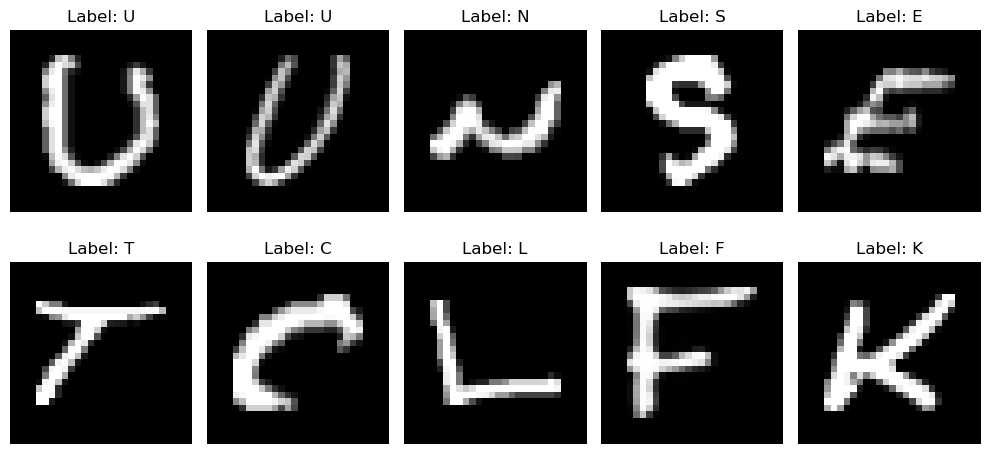

In [20]:
def plot_images(images, labels, num_images=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)  # Create a grid of 2 rows and 5 columns
        plt.imshow(images[i], cmap='gray')  # Display image
        plt.title(f"Label: {labels[i]}")  # Display corresponding label
        plt.axis('off')  # Hide axes
    plt.tight_layout()
    plt.show()


labels_alphabet = [chr(label + 65) for label in y_test]  # Convert encoded labels to A-Z letters

# Plot the first 10 images with their labels
plot_images(X_test_reshaped, labels_alphabet, num_images=10)


### First experiment -- SVM models 

#### Train SVM model with linear kernel.

In [ ]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

In [ ]:
# Predictions using the linear kernel model
y_pred_linear = svm_linear.predict(X_test)

In [ ]:
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

In [ ]:
# Predictions using the non-linear (RBF) kernel model
y_pred_rbf = svm_rbf.predict(X_test)